Metric 1 (Playgrounds) <br>
by: Dorothy Crow

## Introduction
Introduce the project, your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

Within our group we brainstromed a unique metric for a way to rank the Pittsburgh neighborhoods. Instead of choosing best place to commit a crime or best we opted for something more wholesome like best neighborhood to be a kid in. With this we can judge the nieghborhoods based on the level of pure goodness they bring the to city. 
    
   **our submetrics**:
   * **playground density** <br>
       <ul>
       - a playground is the best thing a kid can experience for free! slides!  swings! who wouldnt want as many as possible?<br>
       - data set being used:

[city of pittsburgh playground](https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367)

    
   * **walkability**<br>
       <ul>
       - a kid can't drive a car and bus passes can be so expenseive all they got are their little legs if they want to get around on their own <br>
       - data set being used: 

[allegheny county walk scores](https://data.wprdc.org/dataset/4d3d4324-b32a-4519-b56f-cee2340057bf/resource/682b1df1-a63b-4413-9362-ba077af63baa/download/walkscorect.xls-walk-score-by-ct.csv)
           <br><br>
   * **school density**<br>
       <ul>
       - schools are a huge deal for kids, it will shape their educational experience for roughly 12 years and thier social circle, it's important to have as many options to pick from <br>
       - data set being used:
           
[enrollment by school and neighborhood](https://data.wprdc.org/dataset/27b6eef7-8825-4cc4-8b48-52c17ac80d37/resource/7b0660d1-c812-496d-ab0a-8560902e9e70/download/neighborhood_school_enrollment.csv)<br><br>
          
   * **density of pools**<br>
       <ul>
       - everyone loves a pool! but especially kids, and who can blame them I cant think of a better way to spend summer, other than diving for pool toys. The more options the better!<br>
       - data set being used:

[pittsburgh city pools](https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a)<br><br>
        
*alternative metrics we debated*: <br>
    <ul> - density of candy stores <br>
    - density of ice cream parlors
           
           In all we ended up not going with these alternatie metrics because we thought our finalized ones were a more wholistic measure, and due a limited amount of data sets to pull from.

## Best neighborhood:

In [1]:
import pprint
import geopandas as gp
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
pg = pd.read_csv("playgrounds.csv")

**All the neighborhoods corresponding with their amount of playgrounds:**

In [2]:
pg.groupby("neighborhood").count()
nghs =[]
for ngh, row in pg.iterrows():
    nghs.append(row["neighborhood"])

#makes a dictionary of the neighborhoods and their corresponding number of playgrounds
nghdict = dict()
for ngh in pg["neighborhood"]:
    if ngh in nghdict:
        nghdict[ngh] = nghdict.get(ngh) + 1
    else:
        nghdict[ngh] = 1
        
pprint.pprint(nghdict)

{'Allegheny Center': 4,
 'Allentown': 1,
 'Banksville': 1,
 'Bedford Dwellings': 1,
 'Beechview': 5,
 'Beltzhoover': 4,
 'Bloomfield': 2,
 'Bluff': 1,
 'Bon Air': 1,
 'Brighton Heights': 2,
 'Brookline': 2,
 'Carrick': 3,
 'Central Lawrenceville': 1,
 'Central Northside': 2,
 'Central Oakland': 1,
 'Crafton Heights': 2,
 'Crawford-Roberts': 3,
 'Duquesne Heights': 1,
 'East Allegheny': 1,
 'East Carnegie': 1,
 'East Liberty': 3,
 'Elliott': 3,
 'Esplen': 1,
 'Fairywood': 1,
 'Fineview': 1,
 'Garfield': 2,
 'Greenfield': 2,
 'Hays': 1,
 'Hazelwood': 3,
 'Highland Park': 4,
 'Homewood North': 1,
 'Homewood West': 1,
 'Larimer': 1,
 'Lincoln Place': 2,
 'Lincoln-Lemington-Belmar': 2,
 'Lower Lawrenceville': 1,
 'Manchester': 2,
 'Marshall-Shadeland': 2,
 'Middle Hill': 1,
 'Morningside': 2,
 'Mount Washington': 3,
 'New Homestead': 1,
 'Oakwood': 1,
 'Perry North': 1,
 'Perry South': 1,
 'Point Breeze North': 1,
 'Polish Hill': 1,
 'Regent Square': 1,
 'Shadyside': 1,
 'Sheraden': 4,
 'So

**However**: to print every neighborhood in a long list would be very hard to understand, let's try to *visualize* this better: <br>
    - first let's condense our data set, and take out all neighborhoods that don't have 4 or more playgrounds.

In [3]:
#makes a condensed dictionary, taking out all neighborhoods without 4 or more playgrounds
smalldict = dict()
for ngh in nghdict:
    if nghdict[ngh] > 3:
        smalldict.update({ngh : nghdict[ngh]})

#coverts condensed dictionary to data frame
nghdf = pd.DataFrame.from_dict(smalldict, orient = 'index')

nghdf= nghdf.rename(columns = {0: 'playground density'})

#prints raw data frame
print(nghdf)


                     playground density
Beechview                             5
South Side Slopes                     5
Squirrel Hill South                   8
Allegheny Center                      4
Highland Park                         4
Sheraden                              4
Beltzhoover                           4


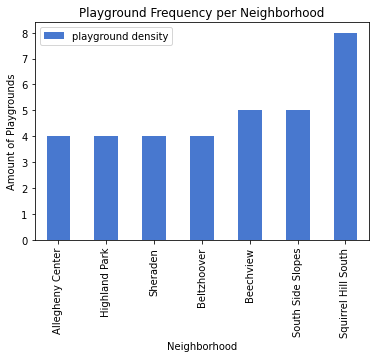

In [5]:
nghdfS = nghdf.sort_values('playground density')
nghdfS.plot(kind="bar")
plt.title("Playground Frequency per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount of Playgrounds")
plt.style.use('seaborn-muted')


That looks better! From this we can see an obvious winner, that being Squirrel Hill with the 8 playgrounds per neighborhood; the highest ratio of all Pittsburgh

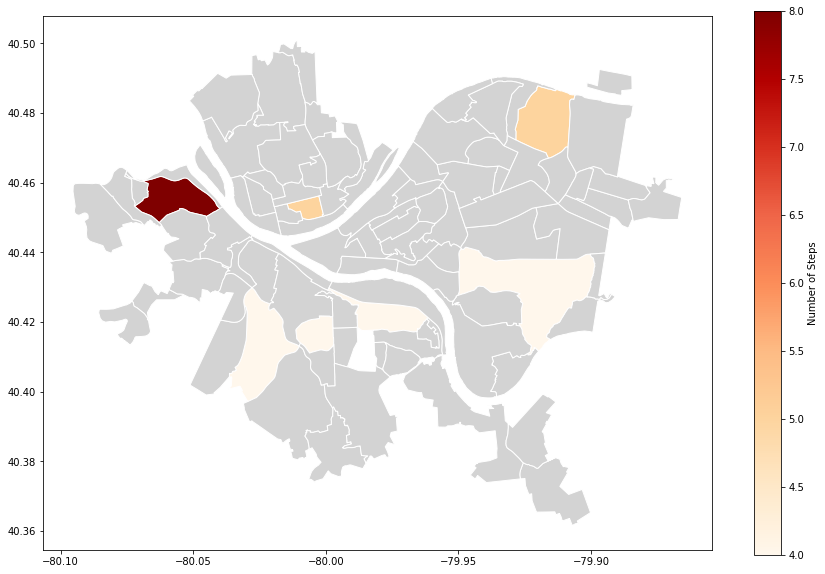

In [6]:
ng = gp.read_file("Neighborhoods_.shp")
dmap = ng.merge(nghdf, how ='left', left_on = 'hood', right_on = nghdfS.index)
dmap.plot(column = 'playground density', 
        cmap='OrRd',              # choose a color palette
        edgecolor="white",        # outline the districts in white
        legend=True,              # show the legend
        legend_kwds={'label': "Number of Steps"}, # label the legend
        figsize=(15, 10),         # set the size
        missing_kwds={"color": "lightgrey"}) # set disctricts with no data to gray


And here's just a map if you were curious about the layout of the top nieghborhoods

## Conclusion:
Based on the "City of Pittsburgh Playgrounds" data set, collected by the Department of Public Works of the City of Pittsburgh, we were able to abstract the important data, that being the frequency of certain neighborhoods within the data set. After this information was gained were able to create our own dictionary and data frame, and condense the data into the top seven neighborhoods for ideal visualization. Finally, through the bar graph of the neighborhoods, we are able to see a clear winner, Squirrel Hill.

Therefore **Squirrel Hill** wins as the best neighborhood to be a kid in, under the metric of most playgrounds :)

As a native Pittsburgher, I'm a little biased for my childhood neighborhood, Stanton Heights, and those surrounding it, Highland Park. However, I had many friends, growing up, that lived in Squirrel Hill and from personal experience, I would Squirrel Hill is a top contender for best neighborhood to be a kid in. 
